# HW 2. Exploratory Data Analysis with South Korea Traffic Accidents dataset

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
#Download Korean font
import matplotlib.font_manager as fm
import matplotlib
font_location = 'NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

## Load dataset

In [3]:
trf = pd.read_csv('도로교통공단_교통사고다발지역_20191010.csv', engine='python')
trf.head()

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10
3,2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10
4,2013060,2012,스쿨존어린이,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,37.648129,127.024430,"{type:Polygon,coordinates:[[[127.0268336,37.65...",2019-10-10


In [4]:
trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10365 entries, 0 to 10364
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사고지역관리번호     10365 non-null  int64  
 1   사고년도         10365 non-null  int64  
 2   사고유형구분       10365 non-null  object 
 3   위치코드         10365 non-null  int64  
 4   시도시군구명       10365 non-null  object 
 5   사고지역위치명      10365 non-null  object 
 6   발생건수         10365 non-null  int64  
 7   사상자수         10365 non-null  int64  
 8   사망자수         10365 non-null  int64  
 9   중상자수         10365 non-null  int64  
 10  경상자수         10365 non-null  int64  
 11  부상자수         10365 non-null  int64  
 12  위도           10365 non-null  float64
 13  경도           10365 non-null  float64
 14  사고다발지역폴리곤정보  10365 non-null  object 
 15  데이터기준일자      10365 non-null  object 
dtypes: float64(2), int64(9), object(5)
memory usage: 1.3+ MB


## Data Preprocessing

### Correction on dataset error

In [5]:
trf.iloc[1194, 7:13]

사상자수          0
사망자수          0
중상자수          3
경상자수          1
부상자수          0
위도      37.5647
Name: 1194, dtype: object

In [6]:
trf.loc[1194, '사상자수'] = 4
trf.loc[1194]

사고지역관리번호                                                 2013114
사고년도                                                        2012
사고유형구분                                                      무단횡단
위치코드                                                   111104001
시도시군구명                                                  서울 서울중부1
사고지역위치명                                  서울특별시 중구 오장동(오장동사거리 부근)
발생건수                                                           4
사상자수                                                           4
사망자수                                                           0
중상자수                                                           3
경상자수                                                           1
부상자수                                                           0
위도                                                       37.5647
경도                                                       127.004
사고다발지역폴리곤정보    {type:Polygon,coordinates:[[[127.0063079,37.56...
데이터기준일자                  

### Split columns to see detailed address

In [7]:
variable_split = trf.사고지역위치명.str.split(" ", 2)
variable_split

0             [서울특별시, 종로구, 혜화동(혜화초교 부근)]
1             [서울특별시, 성북구, 종암동(숭례초교 부근)]
2          [서울특별시, 성북구, 동소문동7가(정덕초교 부근)]
3             [서울특별시, 성북구, 석관동(석관초교 부근)]
4             [서울특별시, 도봉구, 쌍문동(쌍문초교 부근)]
                      ...               
10360    [경기도, 파주시, 금촌동(우리은행 파주금융센터 부근)]
10361         [경기도, 파주시, 조리읍(봉일천우체국 부근)]
10362          [경기도, 파주시, 금촌동(금촌사거리 부근)]
10363    [경기도, 구리시, 수택동(세븐일레븐 구리으뜸점 부근)]
10364        [경기도, 포천시, 소흘읍(송우순복음교회 부근)]
Name: 사고지역위치명, Length: 10365, dtype: object

In [8]:
province = variable_split.str.get(0)
province

0        서울특별시
1        서울특별시
2        서울특별시
3        서울특별시
4        서울특별시
         ...  
10360      경기도
10361      경기도
10362      경기도
10363      경기도
10364      경기도
Name: 사고지역위치명, Length: 10365, dtype: object

In [9]:
city_district = variable_split.str.get(1)
city_district

0        종로구
1        성북구
2        성북구
3        성북구
4        도봉구
        ... 
10360    파주시
10361    파주시
10362    파주시
10363    구리시
10364    포천시
Name: 사고지역위치명, Length: 10365, dtype: object

In [10]:
town = variable_split.str.get(2)
town

0               혜화동(혜화초교 부근)
1               종암동(숭례초교 부근)
2            동소문동7가(정덕초교 부근)
3               석관동(석관초교 부근)
4               쌍문동(쌍문초교 부근)
                ...         
10360    금촌동(우리은행 파주금융센터 부근)
10361         조리읍(봉일천우체국 부근)
10362          금촌동(금촌사거리 부근)
10363    수택동(세븐일레븐 구리으뜸점 부근)
10364        소흘읍(송우순복음교회 부근)
Name: 사고지역위치명, Length: 10365, dtype: object

### Add Ratio data

In [11]:
death_rate = trf['사망자수']/trf['사상자수']
death_rate

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10360    0.0
10361    0.0
10362    0.0
10363    0.0
10364    0.0
Length: 10365, dtype: float64

In [12]:
heavy_injury_rate = trf['중상자수']/trf['사상자수']
heavy_injury_rate

0        0.500000
1        0.000000
2        1.000000
3        0.666667
4        0.000000
           ...   
10360    0.285714
10361    0.400000
10362    0.500000
10363    0.333333
10364    0.200000
Length: 10365, dtype: float64

In [13]:
trf['도/특별시'] = province
trf['시/구'] = city_district
trf['읍면동'] = town
trf['사망률'] = death_rate
trf['중상률'] = heavy_injury_rate
trf

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,...,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,도/특별시,시/구,읍면동,사망률,중상률
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,...,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,서울특별시,종로구,혜화동(혜화초교 부근),0.0,0.500000
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,...,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,서울특별시,성북구,종암동(숭례초교 부근),0.0,0.000000
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,...,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,서울특별시,성북구,동소문동7가(정덕초교 부근),0.0,1.000000
3,2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,...,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10,서울특별시,성북구,석관동(석관초교 부근),0.0,0.666667
4,2013060,2012,스쿨존어린이,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,...,0,37.648129,127.024430,"{type:Polygon,coordinates:[[[127.0268336,37.65...",2019-10-10,서울특별시,도봉구,쌍문동(쌍문초교 부근),0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10360,2019066,2018,무단횡단,280641002,경기 파주2,경기도 파주시 금촌동(우리은행 파주금융센터 부근),5,7,0,2,...,0,37.757022,126.773592,"{type:Polygon,coordinates:[[[126.77628656,37.7...",2019-10-10,경기도,파주시,금촌동(우리은행 파주금융센터 부근),0.0,0.285714
10361,2019066,2018,무단횡단,280641003,경기 파주3,경기도 파주시 조리읍(봉일천우체국 부근),5,5,0,2,...,0,37.743755,126.806671,"{type:Polygon,coordinates:[[[126.80936607,37.7...",2019-10-10,경기도,파주시,조리읍(봉일천우체국 부근),0.0,0.400000
10362,2019066,2018,무단횡단,280641004,경기 파주4,경기도 파주시 금촌동(금촌사거리 부근),4,4,0,2,...,0,37.763186,126.773463,"{type:Polygon,coordinates:[[[126.77615816,37.7...",2019-10-10,경기도,파주시,금촌동(금촌사거리 부근),0.0,0.500000
10363,2019066,2018,무단횡단,280941001,경기 구리1,경기도 구리시 수택동(세븐일레븐 구리으뜸점 부근),6,6,0,2,...,0,37.598290,127.136542,"{type:Polygon,coordinates:[[[127.13923669,37.5...",2019-10-10,경기도,구리시,수택동(세븐일레븐 구리으뜸점 부근),0.0,0.333333


### Check if there is any missing value

In [14]:
trf.isnull().sum()

사고지역관리번호       0
사고년도           0
사고유형구분         0
위치코드           0
시도시군구명         0
사고지역위치명        0
발생건수           0
사상자수           0
사망자수           0
중상자수           0
경상자수           0
부상자수           0
위도             0
경도             0
사고다발지역폴리곤정보    0
데이터기준일자        0
도/특별시          0
시/구            0
읍면동            0
사망률            0
중상률            0
dtype: int64

## Exploratory Data Analysis

In [15]:
trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10365 entries, 0 to 10364
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사고지역관리번호     10365 non-null  int64  
 1   사고년도         10365 non-null  int64  
 2   사고유형구분       10365 non-null  object 
 3   위치코드         10365 non-null  int64  
 4   시도시군구명       10365 non-null  object 
 5   사고지역위치명      10365 non-null  object 
 6   발생건수         10365 non-null  int64  
 7   사상자수         10365 non-null  int64  
 8   사망자수         10365 non-null  int64  
 9   중상자수         10365 non-null  int64  
 10  경상자수         10365 non-null  int64  
 11  부상자수         10365 non-null  int64  
 12  위도           10365 non-null  float64
 13  경도           10365 non-null  float64
 14  사고다발지역폴리곤정보  10365 non-null  object 
 15  데이터기준일자      10365 non-null  object 
 16  도/특별시        10365 non-null  object 
 17  시/구          10365 non-null  object 
 18  읍면동          10365 non-null  object 
 19  사망률 

In [16]:
trf[['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '사망률', '중상률']].describe()

,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,사망률,중상률
count,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000
mean,4.750796,5.018524,0.234250,2.389194,2.046792,0.348288,0.057310,0.477081
std,2.038119,2.275175,0.508633,1.743488,1.569080,0.706061,0.140482,0.271059
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000
50%,4.000000,4.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.500000
75%,5.000000,6.000000,0.000000,3.000000,3.000000,1.000000,0.000000,0.666667
max,27.000000,31.000000,4.000000,22.000000,15.000000,9.000000,1.000000,1.000000


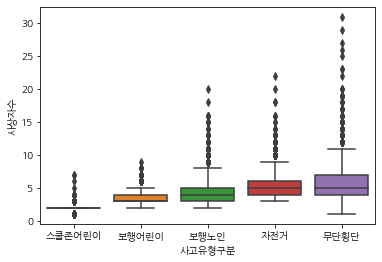

In [17]:
sns.boxplot(x='사고유형구분', y='사상자수', data=trf)

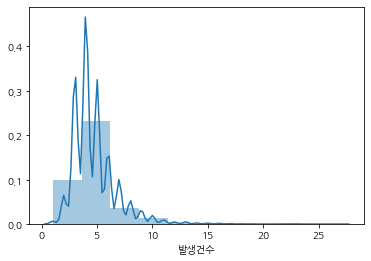

In [18]:
sns.distplot(trf['발생건수'], bins=10)

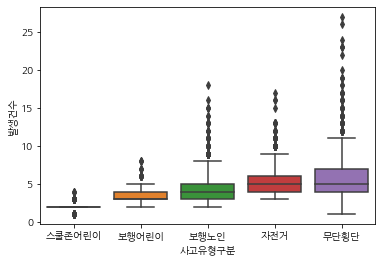

In [19]:
sns.boxplot(x='사고유형구분', y='발생건수', data=trf)

In [20]:
type_count = trf['사고유형구분'].value_counts()
type_count

보행노인      3919
자전거       3315
무단횡단      2006
보행어린이      852
스쿨존어린이     273
Name: 사고유형구분, dtype: int64

([<matplotlib.patches.Wedge at 0x1df928d2d08>,
 [Text(0.4110365851777254, 1.0203180512200276, '보행노인'),
  Text(-1.0687743902839855, -0.26023316981717615, '자전거'),
  Text(0.3048566214300809, -1.05691174672734, '무단횡단'),
  Text(1.0027184731649346, -0.452278303231299, '보행어린이'),
  Text(1.0962364199672332, -0.0909159586509648, '스쿨존어린이')],
 [Text(0.22420177373330474, 0.5565371188472877, '38%'),
  Text(-0.5829678492458101, -0.14194536535482333, '32%'),
  Text(0.1662854298709532, -0.5764973163967307, '19%'),
  Text(0.5469373489990551, -0.24669725630798123, '8%'),
  Text(0.5979471381639453, -0.049590522900526256, '3%')])

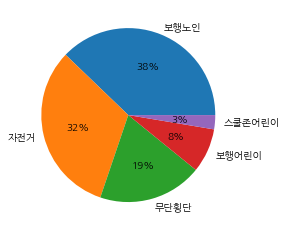

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.pie(type_count.values, labels=type_count.index, autopct='%1.0f%%')

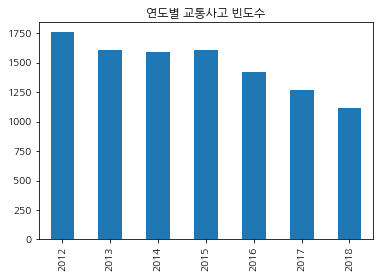

In [22]:
trf['사고년도'].value_counts().sort_index().plot(kind='bar')
plt.title('연도별 교통사고 빈도수')
plt.show()

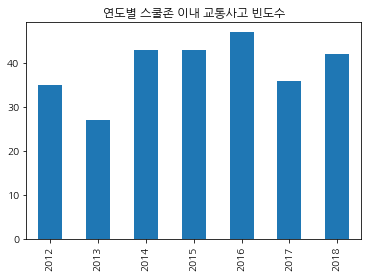

In [23]:
trf[trf['사고유형구분']=='스쿨존어린이']['사고년도'].value_counts().sort_index().plot(kind='bar')
plt.title('연도별 스쿨존 이내 교통사고 빈도수')
plt.show()

In [24]:
t_death_rate = trf.groupby('사고유형구분')['사망률'].mean()
t_death_rate

사고유형구분
무단횡단      0.073137
보행노인      0.092555
보행어린이     0.006942
스쿨존어린이    0.103942
자전거       0.015169
Name: 사망률, dtype: float64

In [25]:
t_heavy_injury_rate = trf.groupby('사고유형구분')['중상률'].mean()
t_heavy_injury_rate

사고유형구분
무단횡단      0.556066
보행노인      0.587250
보행어린이     0.328319
스쿨존어린이    0.352677
자전거       0.347521
Name: 중상률, dtype: float64

Text(0.5, 1.0, '사망률')

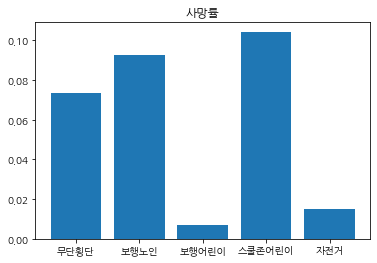

In [26]:
plt.bar(t_death_rate.index, t_death_rate.values)
plt.title('사망률')

Text(0.5, 1.0, '중상률')

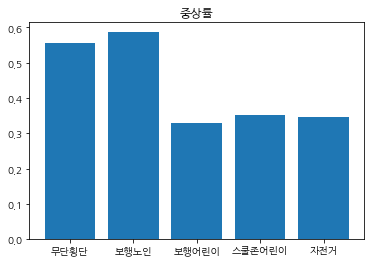

In [27]:
plt.bar(t_heavy_injury_rate.index, t_heavy_injury_rate.values)
plt.title('중상률')

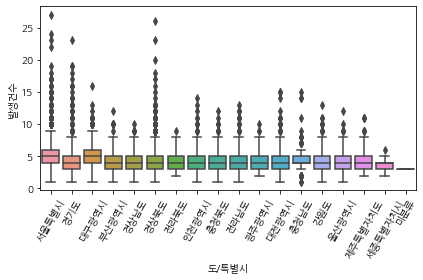

In [28]:
sns.boxplot(x='도/특별시', y='발생건수', data=trf)
plt.xticks(plt.xticks()[0], trf['도/특별시'].value_counts().index, rotation=60)
plt.tight_layout()
plt.show()

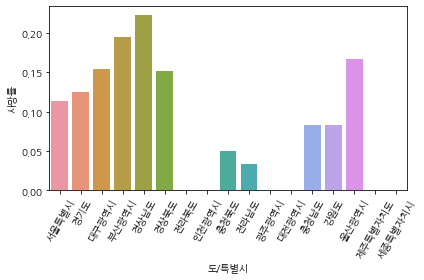

In [29]:
sns.barplot(x='도/특별시', y='사망률', data=trf[trf['사고유형구분']=='스쿨존어린이'],  ci=None)
plt.xticks(plt.xticks()[0], trf['도/특별시'].value_counts().index, rotation=60)
plt.tight_layout()
plt.show()

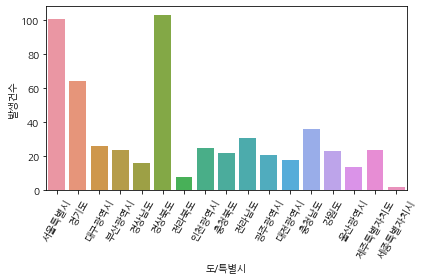

In [30]:
sns.barplot(x='도/특별시', y='발생건수', data=trf[trf['사고유형구분']=='스쿨존어린이'], ci=None, estimator=sum)
plt.xticks(plt.xticks()[0], trf['도/특별시'].value_counts().index, rotation=60)
plt.tight_layout()
plt.show()

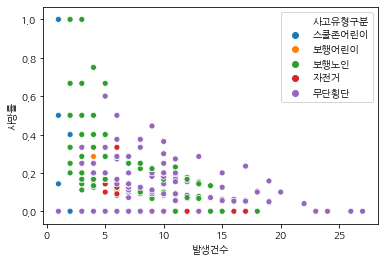

In [31]:
sns.scatterplot(x='발생건수', y='사망률',hue='사고유형구분', data=trf)

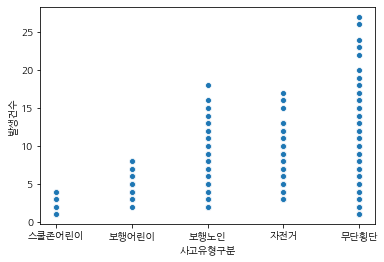

In [32]:
sns.scatterplot(x="사고유형구분", y="발생건수", data=trf)

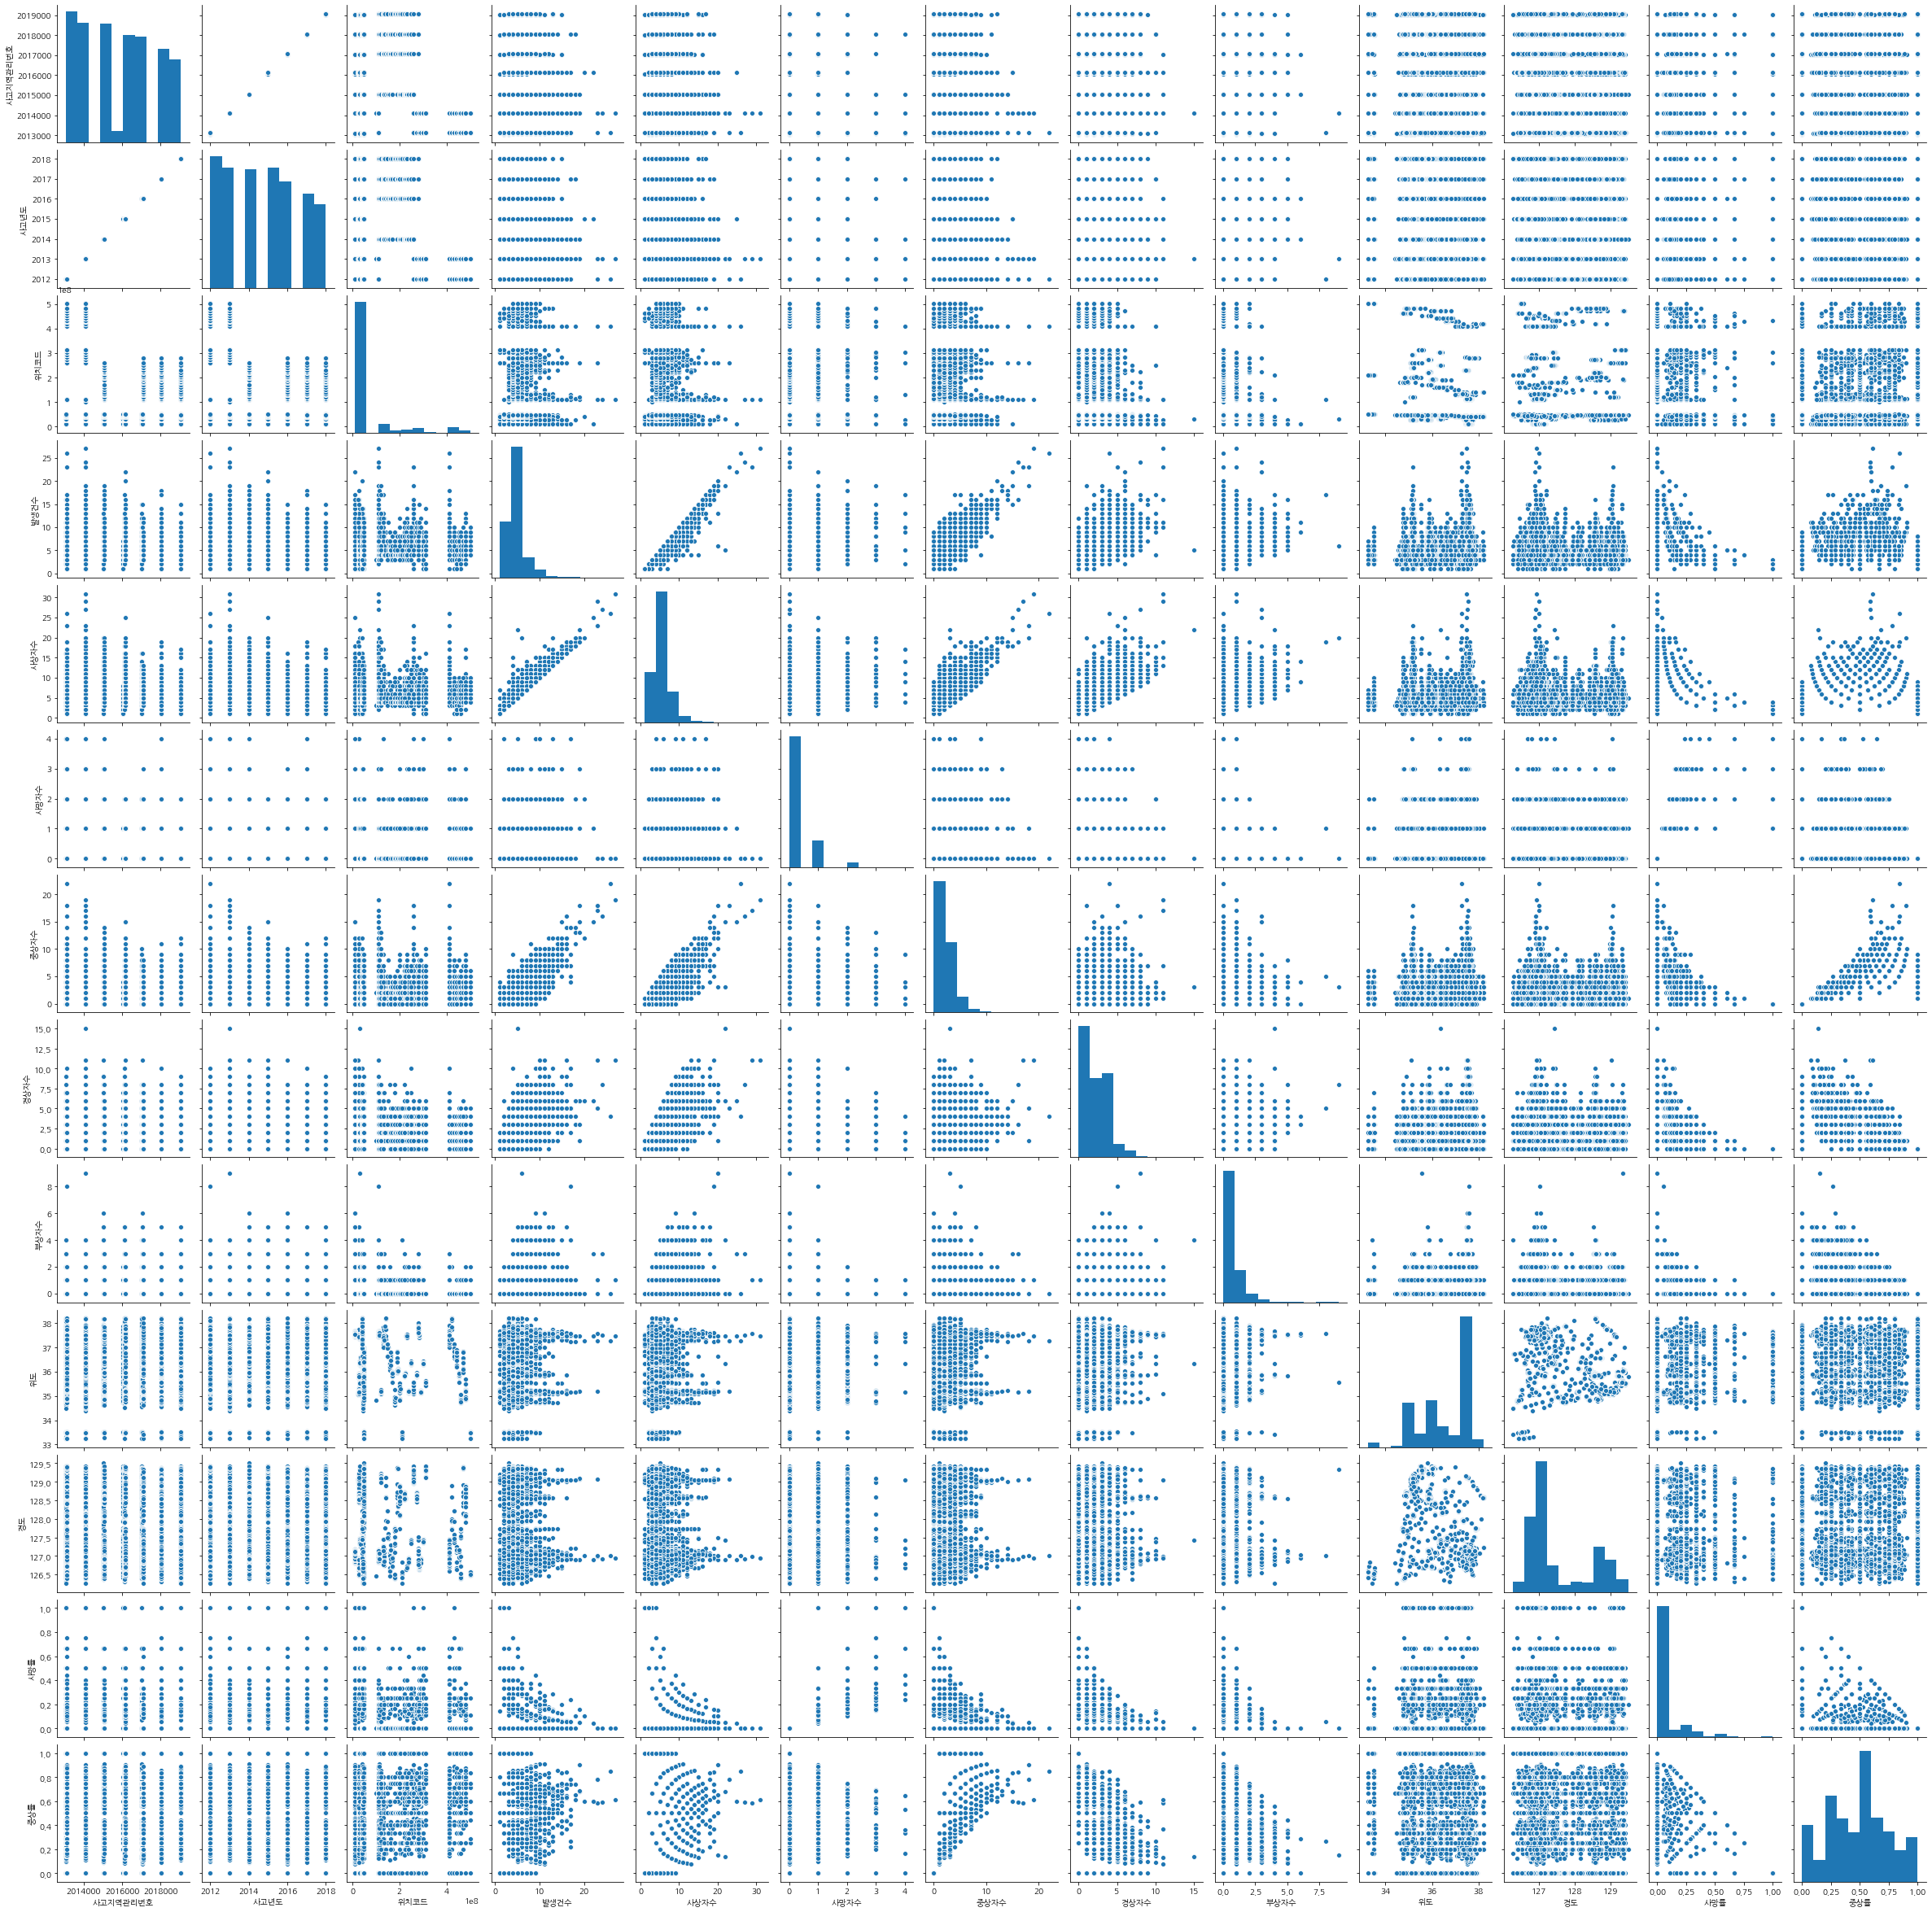

In [33]:
sns.pairplot(trf)